# Mini Projeto

**Membros**
1.   Heitor Coimbra 
2.   João Vítor Valadares
3.   Pedro Betman


In [ ]:
import statistics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
def intToBinary(int_val):
    output = str(bin(int_val).replace("0b", ""))
    while len(output)<3:
      output = '0'+output
    return output

def binaryToInt(byte_string):
    return int(byte_string, 2)

In [ ]:
import numpy as np
import sys
import random

nQueens = 8
STOP_CTR = 28
MUTATE = 0.4
MUTATE_FLAG = True
MAX_ITER = 10000
POPULATION = 100
CHILDREN_POOL_SIZE = 2
RECOMBINATION = 0.9
SURVIVAL_RATE = 0.2

class BoardPosition:
  def __init__(self):
    self.sequence = None
    self.fitness = None
  def setSequence(self, val):
    self.sequence = val
  def setFitness(self, fitness):
    self.fitness = fitness
  def getAttr(self):
    return {'sequence':self.sequence, 'fitness':self.fitness}
  def __str__(self): 
        return str(self.__dict__)

def fitness(chromosome = None):
  chromosome = [binaryToInt(a) for a in chromosome]

  clashes = 0;
  row_col_clashes = abs(len(chromosome) - len(np.unique(chromosome)))
  clashes += row_col_clashes

  # calculate diagonal clashes
  for i in range(len(chromosome)):
    for j in range(len(chromosome)):
      if ( i != j):
        dx = abs(i-j)
        dy = abs(chromosome[i] - chromosome[j])
        if(dx == dy):
          clashes += 1


  return 28 - clashes	


def generateChromosome():
  # randomly generates a sequence of board states.
  global nQueens
  init_distribution = np.arange(nQueens)
  np.random.shuffle(init_distribution)
  chromosome = [intToBinary(gene) for gene in init_distribution]
  return chromosome

def generatePopulation(population_size = 100):
  global POPULATION

  POPULATION = population_size

  population = [BoardPosition() for i in range(population_size)]
  for i in range(population_size):
    population[i].setSequence(generateChromosome())
    population[i].setFitness(fitness(population[i].sequence))

  return population

def getParent():
  globals()
  parent1, parent2 = None, None

  summation_fitness = np.sum([x.fitness for x in population])
  for each in population:
    pass#each.survival = each.fitness/(summation_fitness*1.0)

  parent_pool = random.sample(population, k=5)
  parent1, parent2 = sorted(parent_pool, key=lambda x: x.fitness, reverse=True)[:2]

  if parent1 is not None and parent2 is not None:
    return parent1, parent2
  else:
    sys.exit(-1)

def reproduce_crossover(parent1, parent2, n_crossover_points = 3):
  globals()
  n = len(parent1.sequence)
  c = np.random.randint(n, size=1)[0]
  cutting_points = []
  cutting_point = 0
  for i in range(n_crossover_points):
    cutting_point_range = list(range(cutting_point+1, n-(n_crossover_points-i)))
    cutting_point = random.choice(cutting_point_range)
    cutting_points.append(cutting_point)
  child = BoardPosition()
  child.sequence = []
  current_parent = parent1
  for cutting_point in cutting_points:
    child.sequence.extend(current_parent.sequence[len(child.sequence):cutting_point])
    if current_parent == parent1:
      current_parent = parent2
    else:
      current_parent = parent1
  child.sequence.extend(current_parent.sequence[len(child.sequence):len(current_parent.sequence)])
  child.setFitness(fitness(child.sequence))
  return child



def mutate(child, mode = 'bitwise_flip'):
  # modes can be bitwise_flip, randomize or swap
  # bitwise_flip flips ONE bit if the mutation occurs
  # randomize changes a random gene (string of 3 bits) into a new randomized gene
  # swap swaps two genes in the chromosome
  if mode == 'bitwise_flip':
    if random.uniform(0, 1) < MUTATE:
      c, bc = np.random.randint(nQueens), np.random.randint(3)
      enlisted_gene = list(child.sequence[c])
      if enlisted_gene[bc] == '0':
        enlisted_gene[bc] = '1'
      else:
        enlisted_gene[bc] = '0'
      new_gene = ''.join(enlisted_gene)
      child.sequence[c] = new_gene
  elif mode == 'swap':
    c1, c2 = random.sample(range(len(child.sequence)), k=2)
    temp = child.sequence[c1]
    child.sequence[c1] = child.sequence[c2]
    child.sequence[c2] = temp
  else: # randomize
    if random.uniform(0, 1) < MUTATE:
      c = np.random.randint(nQueens)
      child.sequence[c] = intToBinary(int(np.random.randint(nQueens)))
  return child

def GA(iteration):
  globals()
  offspring = []
  n_survivors = int(SURVIVAL_RATE * POPULATION)
  new_population = sorted(population, key=lambda x: x.fitness, reverse=True)[:n_survivors]
  new_reproductions = int(((1.0 - SURVIVAL_RATE) * POPULATION)/CHILDREN_POOL_SIZE)
  for i in range(new_reproductions):
    parent1, parent2 = getParent()
    for j in range(CHILDREN_POOL_SIZE):
      if random.uniform(0, 1) < RECOMBINATION:
        child = reproduce_crossover(parent1, parent2)
      else:
        copy_parent = random.choice([parent1, parent2])
        child = BoardPosition()
        child.setSequence(copy_parent.sequence)
        child.setFitness(copy_parent.fitness)
      if(MUTATE_FLAG):
        child = mutate(child)
      new_population.append(child)
  return new_population


def stop():
	globals()
	# print population[0], " printing population[0]"
	fitnessvals = [pos.fitness for pos in population]
	if STOP_CTR in fitnessvals:
	  return True
	if MAX_ITER == iteration:
		return True
	return False

population = generatePopulation(100)

print ("POPULATION size : ", len(population))

execution = 0
iterations = []
average_fitness = []
std_fitness = []
best_ind = []
best_seq = []
while execution < 30:
  population = generatePopulation(100)
  execution +=1
  print("Execution number: ", execution)
  iteration = 0
  true_BI = []
  
  while not stop():
    # keep iteratin till  you find the best position
    population = GA(iteration)
    iteration +=1 
    sorted_population = population.sort(key=lambda x: x.fitness, reverse=True)
    best_ind.append(population[0])
  for each in population:
    if each.fitness == 28:
      print(each.sequence)
      true_BI.append(each)
      best_seq.append(each.sequence)
  iterations.append(iteration)
  pop_fitness = [x.fitness for x in population]
  average_fitness.append(statistics.mean(pop_fitness))
  std_fitness.append(statistics.stdev(pop_fitness))
  print(" #"*10 ,"Current generation : ", iteration , " #"*10)
  print("best individual(s) : ", *true_BI)
  print("Average Fitness: ", statistics.mean(pop_fitness))
  print("Iteration number : ", iteration, "\n")
print("Average number of convergences per execution of all 30 executions: ", len(best_seq)/30)
print("Average iterations of all 30 executions: ", statistics.mean(iterations))
print("Standard Deviation iterations of the 30 executions is: ", statistics.stdev(iterations))
print("Average Fitness of all 30 executions: ", statistics.mean(average_fitness))
print("Standard Deviation Fitness of the 30 executions is: ", statistics.stdev(std_fitness))

POPULATION size :  100
Execution number:  1
['010', '101', '001', '110', '110', '000', '111', '011']
 # # # # # # # # # # Current generation :  5286  # # # # # # # # # #
best individual(s) :  {'sequence': ['010', '101', '001', '110', '110', '000', '111', '011'], 'fitness': 28}
Average Fitness:  18.41
Iteration number :  5286 

Execution number:  2
['101', '010', '110', '001', '011', '111', '000', '100']
 # # # # # # # # # # Current generation :  4  # # # # # # # # # #
best individual(s) :  {'sequence': ['101', '010', '110', '001', '011', '111', '000', '100'], 'fitness': 28}
Average Fitness:  21.31
Iteration number :  4 

Execution number:  3
['001', '100', '110', '000', '010', '111', '101', '011']
 # # # # # # # # # # Current generation :  16  # # # # # # # # # #
best individual(s) :  {'sequence': ['001', '100', '110', '000', '010', '111', '101', '011'], 'fitness': 28}
Average Fitness:  22.92
Iteration number :  16 

Execution number:  4
['100', '000', '111', '011', '001', '110', '010'

In [ ]:
iterations_mean = statistics.mean(iterations)
iterations_std = statistics.stdev(iterations)
fitness_mean = statistics.mean(average_fitness)
fitness_std = statistics.stdev(average_fitness)

#data = {'Average Iterations': iterations_mean, 'Std Iterations': iterations_std }
df1 = pd.DataFrame({'Average Iterations': [iterations_mean], 'Std Iterations': [iterations_std], 'Average Fitness': [fitness_mean], 'Std Fitness': [fitness_std]})
df1.head()

,Average Iterations,Std Iterations,Average Fitness,Std Fitness
0,517.933333,880.991132,20.748333,2.275627


In [ ]:
df2 = pd.DataFrame(data = {'Iterations': iterations, 'Average Fitness': average_fitness, 'Std Fitness': std_fitness})
display(df2)

,Iterations,Average Fitness,Std Fitness
0,23,25.52,2.560303
1,0,18.10,4.351941
2,498,24.47,3.144516
3,0,18.54,4.118007
4,92,21.74,4.984055
5,6,23.10,3.056703
6,232,19.67,4.870142
7,47,23.89,2.891628
8,27,24.05,2.948634
9,26,21.78,5.252378


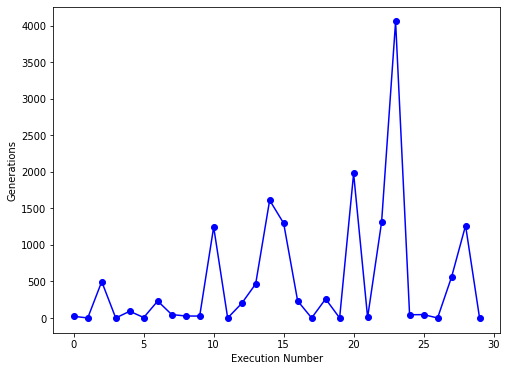

In [ ]:
x_axis = np.arange(start=0, stop=len(iterations), step=1)
plt.figure(figsize=(8,6))
plt.plot(x_axis, iterations, marker='o', c='blue')
plt.ylabel('Generations')
plt.xlabel('Execution Number')
plt.show()  

In [ ]:
best_fitness_Array = []
count_25 = 0
count_26 = 0
count_27 = 0
count_28 = 0

for each in best_ind:
  if (each.fitness == 25):
    count_25 +=1
  if (each.fitness == 26):
    count_26 +=1
  if (each.fitness == 27):
    count_27 +=1
  if (each.fitness == 28):
    count_28 +=1
  best_fitness_Array.append(each.fitness)

print(count_25)
print(count_26)
print(count_27)
print(count_28)


31
20407
183455
8


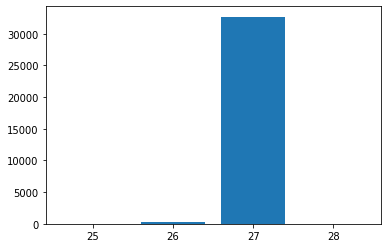

In [ ]:
# Make a random dataset:
height = [count_25, count_26, count_27, count_28]
bars = ('25', '26', '27', '28')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

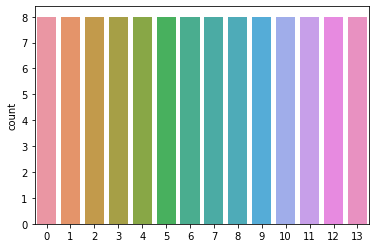

In [ ]:
sns.countplot(data = best_seq)
plt.show()